# Worksheet 12

Name:  Xingyou Chen
UID: U61615803

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes. It is binary classification task.
2. No. How long in months is not a discreate category.
3. Yes. 1-5 stars is multiclass classfication task.
4. No. It tries to predict a continuous quantity.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

1. split dataset into training and testing sets.
2. Choose relevant class attribute .
3. preprocess data(scaling, handling missing value...etc).
4. evaluate the model and do iteration.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

1. underfitting occurs when a model is too simple to capture the underlying structure of the data. Signs to look out includes poor performance on the training data and when chosen model is too simple comparing to the complexity of the task.
2. Overfitting occurs when a model leanrs the training data too well, including noises and outliers, rather than the underlying trend we need. It fits not only the signal but also the noises. 
Signs: 1. high performance on the training set but poor on the testing set. 2. A very complex model with many parameters. 3. Hard to find generalization.

### K Nearest Neighbors

In [52]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

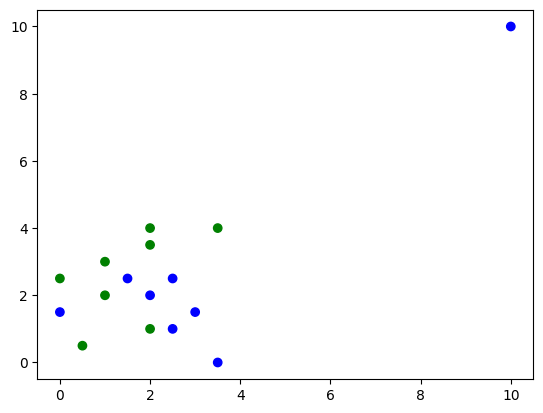

In [53]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]])
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

10 is the outlier for both Attribute A and B.

In [54]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

No specific points look like noise points for the new dataset

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

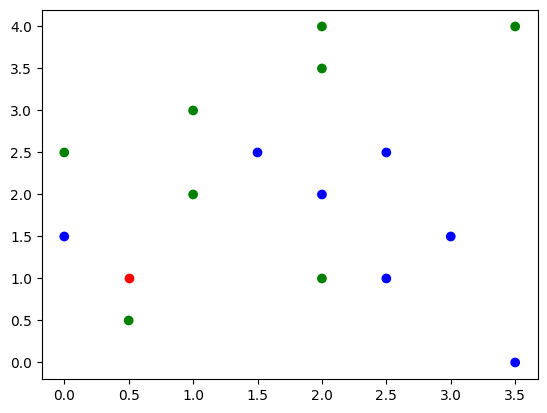

In [55]:
new_point = [0.5, 1]
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]])
plt.scatter(new_point[0], new_point[1], color='r')
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


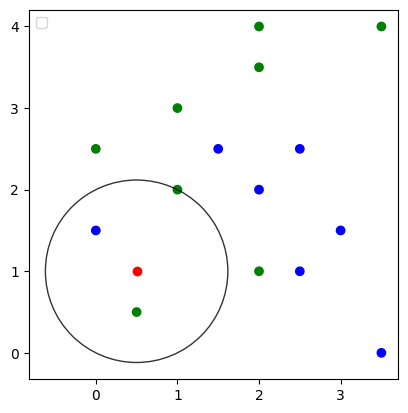

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def n_closest_to(example, n):
    distances = []
    for i in range(len(data["Attribute A"])):
        point = np.array((data["Attribute A"][i], data["Attribute B"][i]))
        distance = np.linalg.norm(point - np.array(example))
        distances.append((distance, i))
    distances.sort(key=lambda x: x[0])
    return distances[:n]

closest_n = n_closest_to(new_point, 3)
indices = [i[1] for i in closest_n]
location = tuple(new_point)
radius = max([i[0] for i in closest_n])

_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]])
axes.scatter(location[0], location[1], color='red')
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal')
plt.legend()
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [57]:

def majority(points):
    classes = [data["Class"][i[1]] for i in points]
    return max(set(classes), key=classes.count)


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [58]:
count = 0
for i in range(len(data["Class"])):
    actual_class = data["Class"][i]
    temp_data = {
        "Attribute A": data["Attribute A"][:i] + data["Attribute A"][i+1:],
        "Attribute B": data["Attribute B"][:i] + data["Attribute B"][i+1:],
        "Class": data["Class"][:i] + data["Class"][i+1:],
    }
    
    def n_closest_to_temp(example, n):
        distances = []
        for j in range(len(temp_data["Attribute A"])):
            point = np.array((temp_data["Attribute A"][j], temp_data["Attribute B"][j]))
            distance = np.linalg.norm(point - np.array(example))
            distances.append((distance, j))
        distances.sort(key=lambda x: x[0])
        return distances[:n]
    
    def assign_class_temp(closest_points_indices):
        classes = [temp_data["Class"][i[1]] for i in closest_points_indices]
        return max(set(classes), key=classes.count)
    
    test_point = [data["Attribute A"][i], data["Attribute B"][i]]
    closest_n_temp = n_closest_to_temp(test_point, 3)
    prediction = assign_class_temp(closest_n_temp)
    
    if prediction == actual_class:
        count += 1

overall_accuracy = count / len(data["Class"])
print(f"Overall accuracy = {overall_accuracy:.2f}")

Overall accuracy = 0.73


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [60]:
from sklearn.neighbors import KNeighborsClassifier


training_accuracies = []
testing_accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    training_accuracy = knn.score(X_train, y_train)
    testing_accuracy = knn.score(X_test, y_test)
    
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, training_accuracies, label='Training Accuracy')
plt.plot(k_values, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyboardInterrupt: 

I would choose K=5 as the optimal value. Because it is still the peak of the testing accuracy curve, while the model performs only slightly better on training data than on testing data.(avoiding overfitting)

BTW My VS CODE just crashed and I have no time to run this cell again before ddl. Trust me I passed it last time:((

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

/home/haru/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


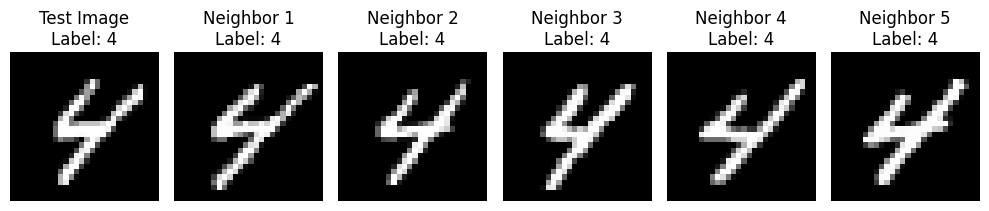

In [ ]:
import random

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

random_index = random.randint(0, len(X_test) - 1)
test_image = X_test.iloc[random_index].values
test_image_label = y_test.iloc[random_index]

neighbors = knn.kneighbors([test_image], return_distance=False)

plt.figure(figsize=(10, 2))
plt.subplot(1, 6, 1)
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f'Test Image\nLabel: {test_image_label}')
plt.axis('off')

for i, neighbor_index in enumerate(neighbors[0]):
    neighbor_image = X_train.iloc[neighbor_index].values
    neighbor_label = y_train.iloc[neighbor_index]
    
    plt.subplot(1, 6, i+2)
    plt.imshow(neighbor_image.reshape(28, 28), cmap='gray')
    plt.title(f'Neighbor {i+1}\nLabel: {neighbor_label}')
    plt.axis('off')

plt.tight_layout()


plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


dimensionality_reduction = PCA(n_components=50)
knn_model = KNeighborsClassifier(n_neighbors=5)
model = make_pipeline(dimensionality_reduction, knn_model)
model.fit(X_train, y_train)

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(train_accuracy)
print(test_accuracy)

0.9854821428571429
0.9761428571428571


The performance was greatly improved as this part only takes about 5 seconds to run. In part b it took me 20 minutes. I choose 50 because it provides a good efficiency while maintaining good accuracy.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

train_df = pd.read_csv("train.csv")
serving_df = pd.read_csv("test.csv")


train_df[['First Name', 'Middle Name', 'Last Name', 'Title']] =train_df['Name'].str.replace(r'\s*\([^)]*\)', '', regex=True).str.split(' ', expand=True)[[2, 3, 0, 1]]
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
serving_df[['First Name', 'Middle Name', 'Last Name', 'Title']] =serving_df['Name'].str.replace(r'\s*\([^)]*\)', '', regex=True).str.split(' ', expand=True)[[2, 3, 0, 1]]
serving_df['FamilySize'] = serving_df['SibSp'] + serving_df['Parch'] + 1

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
serving_df['Age'].fillna(serving_df['Age'].median(), inplace=True)

train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
serving_df['Sex'] = serving_df['Sex'].map({'female': 0, 'male': 1}).astype(int)


title_mapping = {
    "Mr.": 1, "Miss.": 2, "Mrs.": 3, "Master.": 4,
    "Dr.": 5, "Rev.": 6, "Col.": 7, "Major.": 7, "Mlle.": 8, "Countess.": 9,
    "Ms.": 2, "Lady.": 9, "Jonkheer.": 10, "Don.": 10, "Dona.": 10, "Sir.": 10,
    "Mme.": 8, "Capt.": 7, "Sir.": 10
}



train_df['Title'] = train_df['Title'].map(title_mapping)
serving_df['Title'] = serving_df['Title'].map(title_mapping)
train_df['Title'].fillna(0, inplace=True)
serving_df['Title'].fillna(0, inplace=True)

X = train_df.drop(['PassengerId','Survived', 'Name', 'First Name', 'Middle Name', 'Last Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y = train_df['Survived']

nan_columns = X.isnull().sum()
print(nan_columns[nan_columns > 0])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_scaled, y)

X_serving = serving_df.drop(['PassengerId', 'Name', 'First Name', 'Middle Name', 'Last Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

X_serving_scaled = scaler.transform(X_serving)

serving_predictions = knn.predict(X_serving_scaled)

submission_df = pd.DataFrame({
    'PassengerId': serving_df['PassengerId'],
    'Survived': serving_predictions
})

save_path = "prediction.csv"
submission_df.to_csv(save_path, index=False)

Series([], dtype: int64)


/tmp/ipykernel_123428/1593540704.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipykernel_123428/1593540704.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

1. I added FamilySize and Title as two features I would used to original dataset. Family size is important becasue a larger family might have had a more difficult time coordinating. Being alone, could also be a disadvantage when accidents happened. Title is crucial because it might suggest their social status. 